<a href="https://colab.research.google.com/github/peterbabulik/QantumRandomNumer/blob/main/Qantum_random_number_circuits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required packages
!pip install cirq scipy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

Comparing Quantum RNG Circuit Designs

Analyzing Basic Hadamard Circuit:

Circuit Design:
(0, 0): ───H───M('result')───
               │
(0, 1): ───H───M─────────────
               │
(0, 2): ───H───M─────────────
               │
(0, 3): ───H───M─────────────

Results:
Generation Rate: 336.44 digits/second
Chi-square statistic: 10.4800
p-value: 0.3130

Digit Distribution:
Digit 0: 10.70% (Deviation: +7.00%)
Digit 1: 10.60% (Deviation: +6.00%)
Digit 2: 11.60% (Deviation: +16.00%)
Digit 3: 9.70% (Deviation: -3.00%)
Digit 4: 8.80% (Deviation: -12.00%)
Digit 5: 9.60% (Deviation: -4.00%)
Digit 6: 10.60% (Deviation: +6.00%)
Digit 7: 10.30% (Deviation: +3.00%)
Digit 8: 7.80% (Deviation: -22.00%)
Digit 9: 10.30% (Deviation: +3.00%)

Analyzing Rotated Circuit:

Circuit Design:
(0, 0): ───Ry(0.5π)─────H───M('result')───
                            │
(0, 1): ───Ry(0.333π)───H───M─────────────
                            │
(0, 2): ───Ry(0.25π)────H───M─────────────
                            │
(

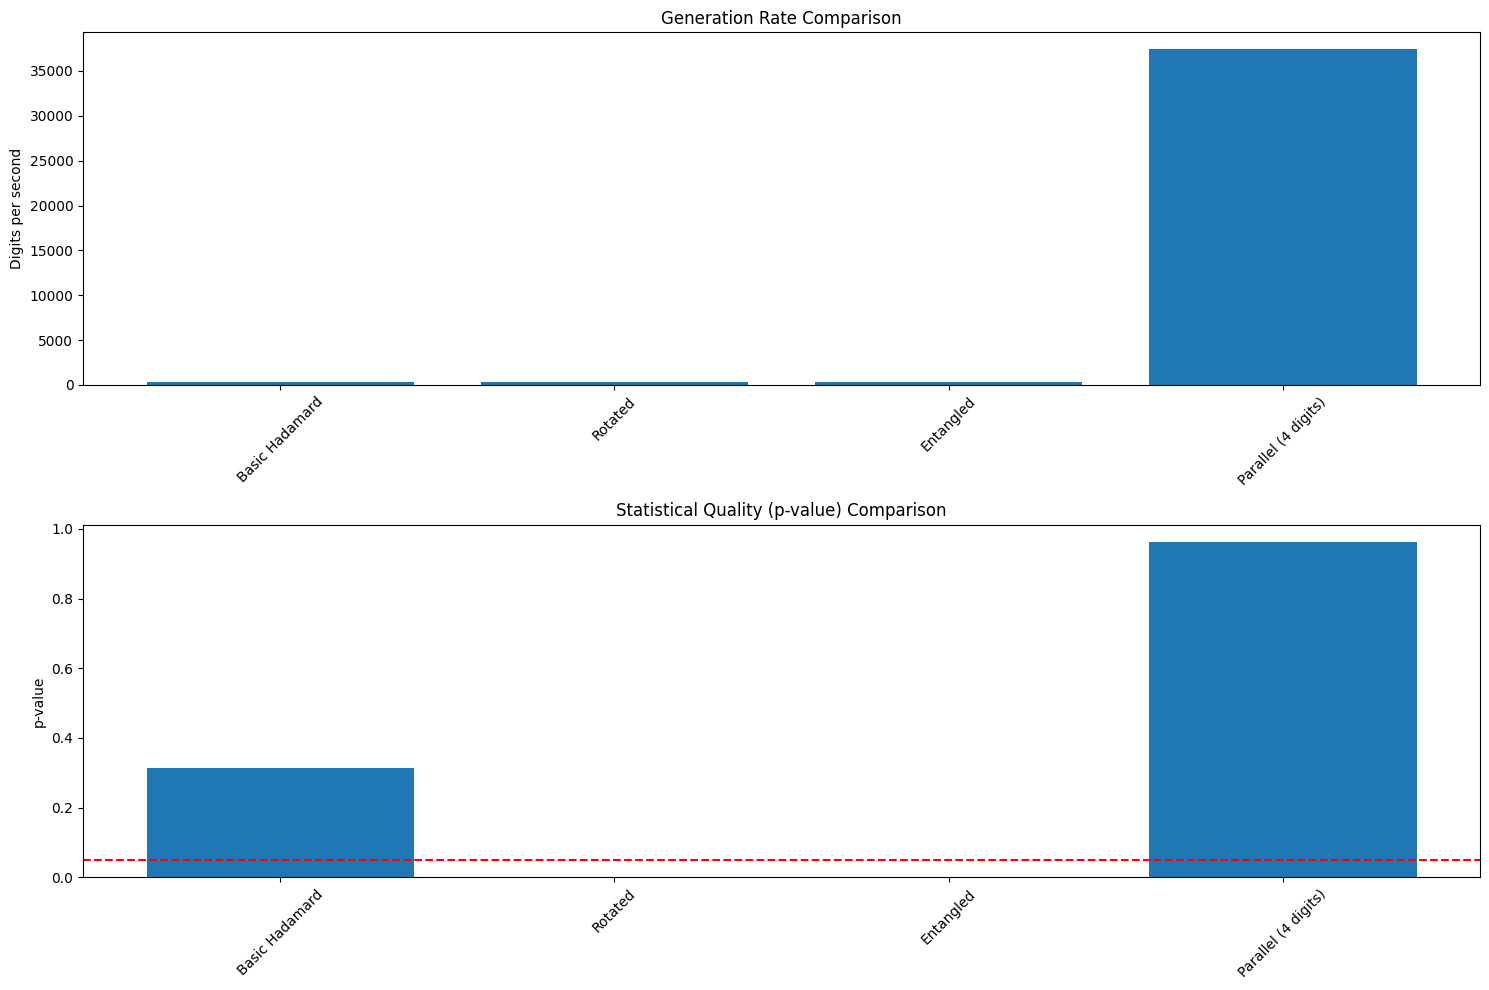

In [2]:



import cirq
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import time
from typing import List, Tuple, Dict

class QuantumRNGCircuit:
    """Base class for different quantum RNG circuit designs"""
    def __init__(self, num_qubits: int = 4):
        self.num_qubits = num_qubits

    def create_circuit(self) -> cirq.Circuit:
        raise NotImplementedError

class BasicHadamardCircuit(QuantumRNGCircuit):
    """Basic circuit using only Hadamard gates"""
    def create_circuit(self) -> cirq.Circuit:
        qubits = [cirq.GridQubit(0, i) for i in range(self.num_qubits)]
        circuit = cirq.Circuit()
        circuit.append(cirq.H.on_each(qubits))
        circuit.append(cirq.measure(*qubits, key='result'))
        return circuit

class RotatedCircuit(QuantumRNGCircuit):
    """Circuit using rotation gates for potentially better randomness"""
    def create_circuit(self) -> cirq.Circuit:
        qubits = [cirq.GridQubit(0, i) for i in range(self.num_qubits)]
        circuit = cirq.Circuit()
        # Apply different rotation angles to each qubit
        for i, qubit in enumerate(qubits):
            angle = np.pi / (2 + i)  # Different rotation for each qubit
            circuit.append(cirq.ry(angle)(qubit))
            circuit.append(cirq.H(qubit))
        circuit.append(cirq.measure(*qubits, key='result'))
        return circuit

class EntangledCircuit(QuantumRNGCircuit):
    """Circuit using entanglement between qubits"""
    def create_circuit(self) -> cirq.Circuit:
        qubits = [cirq.GridQubit(0, i) for i in range(self.num_qubits)]
        circuit = cirq.Circuit()
        # Create entanglement
        circuit.append(cirq.H(qubits[0]))
        for i in range(self.num_qubits - 1):
            circuit.append(cirq.CNOT(qubits[i], qubits[i + 1]))
        circuit.append(cirq.measure(*qubits, key='result'))
        return circuit

class ParallelCircuit(QuantumRNGCircuit):
    """Generate multiple digits in parallel"""
    def create_circuit(self) -> cirq.Circuit:
        # Create a 2D grid of qubits for parallel generation
        qubits = [[cirq.GridQubit(i, j) for j in range(4)]
                 for i in range(self.num_qubits)]
        circuit = cirq.Circuit()

        for qubit_row in qubits:
            circuit.append(cirq.H.on_each(qubit_row))
            # Add some entanglement within each group
            for i in range(len(qubit_row) - 1):
                circuit.append(cirq.CZ(qubit_row[i], qubit_row[i + 1]))

        # Measure each group separately
        for i, qubit_row in enumerate(qubits):
            circuit.append(cirq.measure(*qubit_row, key=f'digit_{i}'))

        return circuit

def analyze_circuit(circuit_type: QuantumRNGCircuit,
                   num_samples: int = 1000,
                   simulator: cirq.Simulator = None) -> Tuple[Dict, float, float, float]:
    """Analyze a circuit's randomness and performance"""
    if simulator is None:
        simulator = cirq.Simulator()

    start_time = time.time()
    circuit = circuit_type.create_circuit()

    # For parallel circuit, handle multiple measurements
    if isinstance(circuit_type, ParallelCircuit):
        results = simulator.run(circuit, repetitions=num_samples)
        digits = []
        for i in range(circuit_type.num_qubits):
            measurements = results.measurements[f'digit_{i}']
            for measurement in measurements:
                value = sum([bit * (2**idx) for idx, bit in enumerate(measurement)])
                if value < 10:  # Rejection sampling
                    digits.append(str(value))
    else:
        # Regular sequential generation
        digits = []
        while len(digits) < num_samples:
            result = simulator.run(circuit, repetitions=1)
            value = sum([bit * (2**i) for i, bit in
                        enumerate(result.measurements['result'][0])])
            if value < 10:
                digits.append(str(value))

    # Calculate timing
    elapsed_time = time.time() - start_time
    generation_rate = len(digits) / elapsed_time

    # Perform statistical analysis
    digit_counts = {str(i): digits.count(str(i)) for i in range(10)}
    expected_count = len(digits) / 10

    chi_square_stat = sum(
        ((count - expected_count) ** 2) / expected_count
        for count in digit_counts.values()
    )

    p_value = 1 - stats.chi2.cdf(chi_square_stat, 9)

    return digit_counts, chi_square_stat, p_value, generation_rate

def compare_circuits(num_samples: int = 1000):
    """Compare different circuit designs"""
    circuits = {
        "Basic Hadamard": BasicHadamardCircuit(),
        "Rotated": RotatedCircuit(),
        "Entangled": EntangledCircuit(),
        "Parallel (4 digits)": ParallelCircuit(4)
    }

    simulator = cirq.Simulator()
    results = {}

    print("Comparing Quantum RNG Circuit Designs")
    print("=" * 50)

    for name, circuit in circuits.items():
        print(f"\nAnalyzing {name} Circuit:")
        counts, chi_square, p_value, rate = analyze_circuit(
            circuit, num_samples, simulator
        )

        # Print circuit
        print("\nCircuit Design:")
        print(circuit.create_circuit())

        # Print statistics
        print("\nResults:")
        print(f"Generation Rate: {rate:.2f} digits/second")
        print(f"Chi-square statistic: {chi_square:.4f}")
        print(f"p-value: {p_value:.4f}")
        print("\nDigit Distribution:")
        total_digits = sum(counts.values())
        for digit, count in counts.items():
            percentage = (count / total_digits) * 100
            expected = total_digits / 10
            deviation = ((count - expected) / expected) * 100
            print(f"Digit {digit}: {percentage:.2f}% (Deviation: {deviation:+.2f}%)")

        results[name] = {
            'counts': counts,
            'chi_square': chi_square,
            'p_value': p_value,
            'rate': rate
        }

    # Comparative visualization
    plt.figure(figsize=(15, 10))

    # Plot generation rates
    plt.subplot(2, 1, 1)
    rates = [results[name]['rate'] for name in circuits.keys()]
    plt.bar(circuits.keys(), rates)
    plt.title('Generation Rate Comparison')
    plt.ylabel('Digits per second')
    plt.xticks(rotation=45)

    # Plot p-values
    plt.subplot(2, 1, 2)
    p_values = [results[name]['p_value'] for name in circuits.keys()]
    plt.bar(circuits.keys(), p_values)
    plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
    plt.title('Statistical Quality (p-value) Comparison')
    plt.ylabel('p-value')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    return results

# Run comparison
results = compare_circuits(1000)

Starting massive parallel quantum random number generation...
Generating 1024-bit random number using 32 parallel digits...

Generation Results:
Number (first 100 digits): 0606700756378450600545668336355388669670767645620061833057551686050382356963735668236037600806850300...
Total digits: 2080
Actual bit length: 6906

Performance:
Generation time: 6.70 seconds
Generation rate: 310.28 digits/second
Rejected values: 1344

Statistical Quality:
Chi-square statistic: 983.4712
p-value: 0.0000

Digit Distribution:
Digit 0: 20.19% (Deviation: +10.19%)
Digit 1: 5.62% (Deviation: -4.38%)
Digit 2: 1.73% (Deviation: -8.27%)
Digit 3: 14.33% (Deviation: +4.33%)
Digit 4: 2.07% (Deviation: -7.93%)
Digit 5: 13.89% (Deviation: +3.89%)
Digit 6: 19.28% (Deviation: +9.28%)
Digit 7: 7.07% (Deviation: -2.93%)
Digit 8: 14.28% (Deviation: +4.28%)
Digit 9: 1.54% (Deviation: -8.46%)


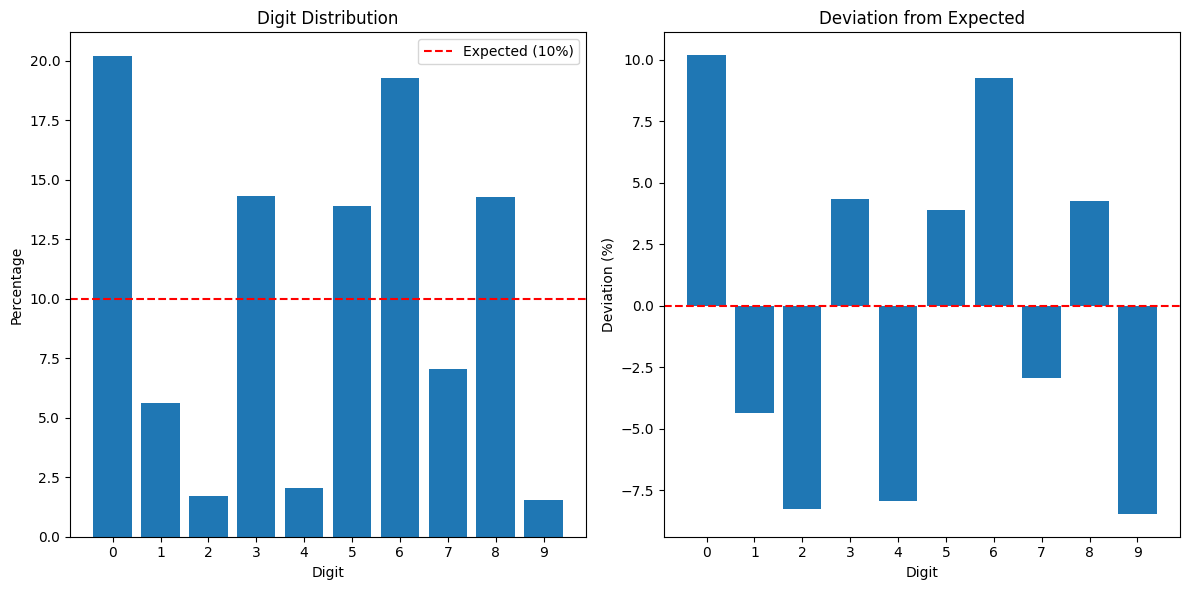

In [5]:

import cirq
import numpy as np
from scipy import stats
import time
from typing import List, Dict
import matplotlib.pyplot as plt

class MassiveParallelQRNG:
    def __init__(self, parallel_digits: int = 32, target_bits: int = 1024):
        """
        Initialize massive parallel quantum random number generator

        Args:
            parallel_digits: Number of digits to generate in parallel
            target_bits: Target size of the final number in bits
        """
        self.parallel_digits = parallel_digits
        self.target_bits = target_bits
        self.qubits_per_digit = 4  # Using 4 qubits to generate 0-9

    def create_circuit(self) -> cirq.Circuit:
        """Creates a massive parallel circuit for random number generation"""
        # Create 2D grid of qubits
        self.qubits = [[cirq.GridQubit(i, j)
                       for j in range(self.qubits_per_digit)]
                      for i in range(self.parallel_digits)]

        circuit = cirq.Circuit()

        # Apply quantum operations to each group of qubits
        for qubit_row in self.qubits:
            # Hadamard gates for superposition
            circuit.append(cirq.H.on_each(qubit_row))

            # Add some entanglement within digit groups
            for i in range(len(qubit_row) - 1):
                circuit.append(cirq.CZ(qubit_row[i], qubit_row[i + 1]))

            # Add some random rotations for better randomness
            for i, qubit in enumerate(qubit_row):
                angle = np.pi / (2 + i)
                # Fixed rotation gate syntax
                circuit.append(cirq.rx(rads=angle)(qubit))

        # Measure all qubit groups
        for i, qubit_row in enumerate(self.qubits):
            circuit.append(cirq.measure(*qubit_row, key=f'digit_{i}'))

        return circuit

    def binary_to_decimal(self, measurements: np.ndarray) -> int:
        """Convert binary measurements to decimal"""
        return sum([bit * (2**idx) for idx, bit in enumerate(measurements)])

    def generate_massive_number(self, simulator: cirq.Simulator = None) -> Dict:
        """
        Generate a massive random number using parallel quantum circuits

        Returns:
            Dictionary containing the number and generation statistics
        """
        if simulator is None:
            simulator = cirq.Simulator()

        start_time = time.time()
        circuit = self.create_circuit()

        # Calculate how many rounds we need for target bit size
        digits_needed = int(np.ceil(self.target_bits * np.log2(10)))
        rounds_needed = int(np.ceil(digits_needed / self.parallel_digits))

        all_digits = []
        rejected_values = 0

        for _ in range(rounds_needed):
            results = simulator.run(circuit, repetitions=1)

            # Process each parallel digit
            for i in range(self.parallel_digits):
                value = self.binary_to_decimal(results.measurements[f'digit_{i}'][0])
                if value < 10:  # Rejection sampling
                    all_digits.append(str(value))
                else:
                    rejected_values += 1

        # Combine digits into one large number
        massive_number = ''.join(all_digits[:digits_needed])

        # Calculate statistics
        generation_time = time.time() - start_time
        digit_counts = {str(i): massive_number.count(str(i))
                       for i in range(10)}

        # Calculate chi-square statistic
        expected_count = len(massive_number) / 10
        chi_square_stat = sum(
            ((count - expected_count) ** 2) / expected_count
            for count in digit_counts.values()
        )
        p_value = 1 - stats.chi2.cdf(chi_square_stat, 9)

        return {
            'number': massive_number,
            'bit_length': len(bin(int(massive_number))[2:]),
            'digit_length': len(massive_number),
            'generation_time': generation_time,
            'digits_per_second': len(massive_number) / generation_time,
            'rejected_values': rejected_values,
            'chi_square': chi_square_stat,
            'p_value': p_value,
            'digit_distribution': digit_counts
        }

    def visualize_distribution(self, digit_counts: Dict):
        """Visualize the distribution of digits"""
        plt.figure(figsize=(12, 6))

        # Calculate percentages and deviations
        total_digits = sum(digit_counts.values())
        percentages = {d: (c/total_digits)*100 for d, c in digit_counts.items()}
        deviations = {d: (c/total_digits)*100 - 10
                     for d, c in digit_counts.items()}

        # Plot distribution
        plt.subplot(1, 2, 1)
        plt.bar(digit_counts.keys(), percentages.values())
        plt.axhline(y=10, color='r', linestyle='--', label='Expected (10%)')
        plt.title('Digit Distribution')
        plt.xlabel('Digit')
        plt.ylabel('Percentage')
        plt.legend()

        # Plot deviations
        plt.subplot(1, 2, 2)
        plt.bar(deviations.keys(), deviations.values())
        plt.axhline(y=0, color='r', linestyle='--')
        plt.title('Deviation from Expected')
        plt.xlabel('Digit')
        plt.ylabel('Deviation (%)')

        plt.tight_layout()
        plt.show()

def demonstrate_massive_rng(parallel_digits: int = 32,
                          target_bits: int = 1024):
    """Demonstrate the massive parallel QRNG"""
    print(f"Generating {target_bits}-bit random number using "
          f"{parallel_digits} parallel digits...")

    generator = MassiveParallelQRNG(parallel_digits, target_bits)
    results = generator.generate_massive_number()

    print("\nGeneration Results:")
    print("=" * 50)
    print(f"Number (first 100 digits): {results['number'][:100]}...")
    print(f"Total digits: {results['digit_length']}")
    print(f"Actual bit length: {results['bit_length']}")
    print(f"\nPerformance:")
    print(f"Generation time: {results['generation_time']:.2f} seconds")
    print(f"Generation rate: {results['digits_per_second']:.2f} digits/second")
    print(f"Rejected values: {results['rejected_values']}")

    print(f"\nStatistical Quality:")
    print(f"Chi-square statistic: {results['chi_square']:.4f}")
    print(f"p-value: {results['p_value']:.4f}")

    print("\nDigit Distribution:")
    total_digits = sum(results['digit_distribution'].values())
    for digit, count in results['digit_distribution'].items():
        percentage = (count / total_digits) * 100
        deviation = percentage - 10
        print(f"Digit {digit}: {percentage:.2f}% "
              f"(Deviation: {deviation:+.2f}%)")

    # Visualize results
    generator.visualize_distribution(results['digit_distribution'])

    return results

# Generate a massive random number
print("Starting massive parallel quantum random number generation...")
results = demonstrate_massive_rng(parallel_digits=32, target_bits=1024)

Starting optimized parallel quantum random number generation...
Generating 1024-bit random number using 32 parallel digits...

Generation Results:
Number (first 100 digits): 9682113298917908355515081493102228155832127801063152044525332060709230247504098228546608420935624297...
Total digits: 2156
Actual bit length: 7163

Performance:
Generation time: 4.28 seconds
Generation rate: 503.60 digits/second
Rejected values: 1268

Statistical Quality:
Chi-square statistic: 2.8312
p-value: 0.9706

Digit Distribution:
Digit 0: 10.30% (Deviation: +0.30%)
Digit 1: 9.97% (Deviation: -0.03%)
Digit 2: 9.60% (Deviation: -0.40%)
Digit 3: 9.97% (Deviation: -0.03%)
Digit 4: 10.11% (Deviation: +0.11%)
Digit 5: 9.65% (Deviation: -0.35%)
Digit 6: 9.83% (Deviation: -0.17%)
Digit 7: 10.11% (Deviation: +0.11%)
Digit 8: 9.60% (Deviation: -0.40%)
Digit 9: 10.85% (Deviation: +0.85%)


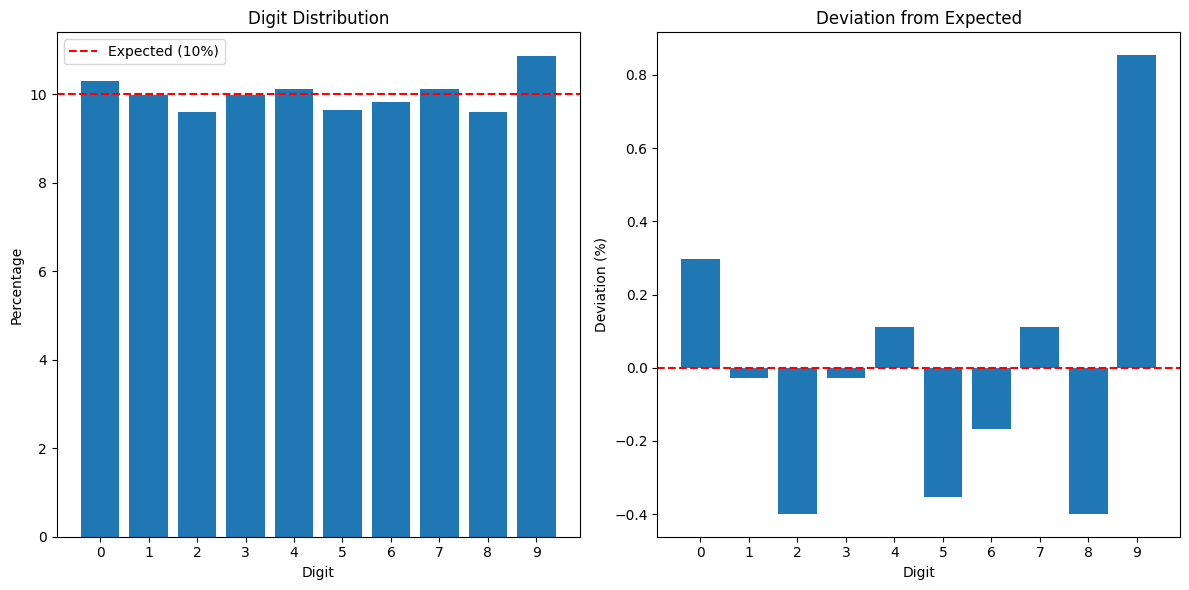

In [7]:


import cirq
import numpy as np
from scipy import stats
import time
from typing import List, Dict
import matplotlib.pyplot as plt

class OptimizedParallelQRNG:
    def __init__(self, parallel_digits: int = 32, target_bits: int = 1024):
        self.parallel_digits = parallel_digits
        self.target_bits = target_bits
        self.qubits_per_digit = 4  # Using 4 qubits to generate 0-9

    def create_circuit(self) -> cirq.Circuit:
        """Creates an optimized parallel circuit for random number generation"""
        # Create 2D grid of qubits
        self.qubits = [[cirq.GridQubit(i, j)
                       for j in range(self.qubits_per_digit)]
                      for i in range(self.parallel_digits)]

        circuit = cirq.Circuit()

        # Apply Hadamard gates to all qubits at once
        all_qubits = [qubit for row in self.qubits for qubit in row]
        circuit.append(cirq.H.on_each(all_qubits))

        # Measure each group separately with unique keys
        for i, qubit_row in enumerate(self.qubits):
            circuit.append(cirq.measure(*qubit_row, key=f'digit{i}'))

        return circuit

    def binary_to_decimal(self, measurements: np.ndarray) -> int:
        """Convert binary measurements to decimal"""
        return sum([bit * (2**idx) for idx, bit in enumerate(measurements)])

    def generate_massive_number(self, simulator: cirq.Simulator = None) -> Dict:
        """Generate a massive random number using parallel quantum circuits"""
        if simulator is None:
            simulator = cirq.Simulator()

        start_time = time.time()
        circuit = self.create_circuit()

        # Calculate needed digits for target bit size
        digits_needed = int(np.ceil(self.target_bits * np.log2(10)))
        rounds_needed = int(np.ceil(digits_needed / self.parallel_digits))

        all_digits = []
        rejected_values = 0

        for _ in range(rounds_needed):
            results = simulator.run(circuit, repetitions=1)

            # Process each parallel digit
            for i in range(self.parallel_digits):
                value = self.binary_to_decimal(results.measurements[f'digit{i}'][0])
                if value < 10:
                    all_digits.append(str(value))
                else:
                    rejected_values += 1

        # Ensure we have exact number of digits needed
        massive_number = ''.join(all_digits[:digits_needed])

        # Calculate statistics
        generation_time = time.time() - start_time
        digit_counts = {str(i): massive_number.count(str(i))
                       for i in range(10)}

        # Calculate chi-square statistic
        expected_count = len(massive_number) / 10
        chi_square_stat = sum(
            ((count - expected_count) ** 2) / expected_count
            for count in digit_counts.values()
        )
        p_value = 1 - stats.chi2.cdf(chi_square_stat, 9)

        return {
            'number': massive_number,
            'bit_length': len(bin(int(massive_number))[2:]),
            'digit_length': len(massive_number),
            'generation_time': generation_time,
            'digits_per_second': len(massive_number) / generation_time,
            'rejected_values': rejected_values,
            'chi_square': chi_square_stat,
            'p_value': p_value,
            'digit_distribution': digit_counts
        }

    def visualize_distribution(self, digit_counts: Dict):
        """Visualize the distribution of digits"""
        plt.figure(figsize=(12, 6))

        # Calculate percentages and deviations
        total_digits = sum(digit_counts.values())
        percentages = {d: (c/total_digits)*100 for d, c in digit_counts.items()}
        deviations = {d: (c/total_digits)*100 - 10
                     for d, c in digit_counts.items()}

        # Plot distribution
        plt.subplot(1, 2, 1)
        plt.bar(digit_counts.keys(), percentages.values())
        plt.axhline(y=10, color='r', linestyle='--', label='Expected (10%)')
        plt.title('Digit Distribution')
        plt.xlabel('Digit')
        plt.ylabel('Percentage')
        plt.legend()

        # Plot deviations
        plt.subplot(1, 2, 2)
        plt.bar(deviations.keys(), deviations.values())
        plt.axhline(y=0, color='r', linestyle='--')
        plt.title('Deviation from Expected')
        plt.xlabel('Digit')
        plt.ylabel('Deviation (%)')

        plt.tight_layout()
        plt.show()

def demonstrate_massive_rng(parallel_digits: int = 32,
                          target_bits: int = 1024):
    """Demonstrate the massive parallel QRNG"""
    print(f"Generating {target_bits}-bit random number using "
          f"{parallel_digits} parallel digits...")

    generator = OptimizedParallelQRNG(parallel_digits, target_bits)
    results = generator.generate_massive_number()

    print("\nGeneration Results:")
    print("=" * 50)
    print(f"Number (first 100 digits): {results['number'][:100]}...")
    print(f"Total digits: {results['digit_length']}")
    print(f"Actual bit length: {results['bit_length']}")
    print(f"\nPerformance:")
    print(f"Generation time: {results['generation_time']:.2f} seconds")
    print(f"Generation rate: {results['digits_per_second']:.2f} digits/second")
    print(f"Rejected values: {results['rejected_values']}")

    print(f"\nStatistical Quality:")
    print(f"Chi-square statistic: {results['chi_square']:.4f}")
    print(f"p-value: {results['p_value']:.4f}")

    print("\nDigit Distribution:")
    total_digits = sum(results['digit_distribution'].values())
    for digit, count in results['digit_distribution'].items():
        percentage = (count / total_digits) * 100
        deviation = percentage - 10
        print(f"Digit {digit}: {percentage:.2f}% "
              f"(Deviation: {deviation:+.2f}%)")

    # Visualize results
    generator.visualize_distribution(results['digit_distribution'])

    return results

# Generate a massive random number
print("Starting optimized parallel quantum random number generation...")
results = demonstrate_massive_rng(parallel_digits=32, target_bits=1024)

Starting parallel scaling benchmark...
Testing 1 parallel digits...
Testing 2 parallel digits...
Testing 3 parallel digits...
Testing 4 parallel digits...
Testing 5 parallel digits...
Testing 6 parallel digits...
Testing 7 parallel digits...
Testing 8 parallel digits...
Testing 9 parallel digits...
Testing 10 parallel digits...
Testing 11 parallel digits...
Testing 12 parallel digits...
Testing 13 parallel digits...
Testing 14 parallel digits...
Testing 15 parallel digits...
Testing 16 parallel digits...


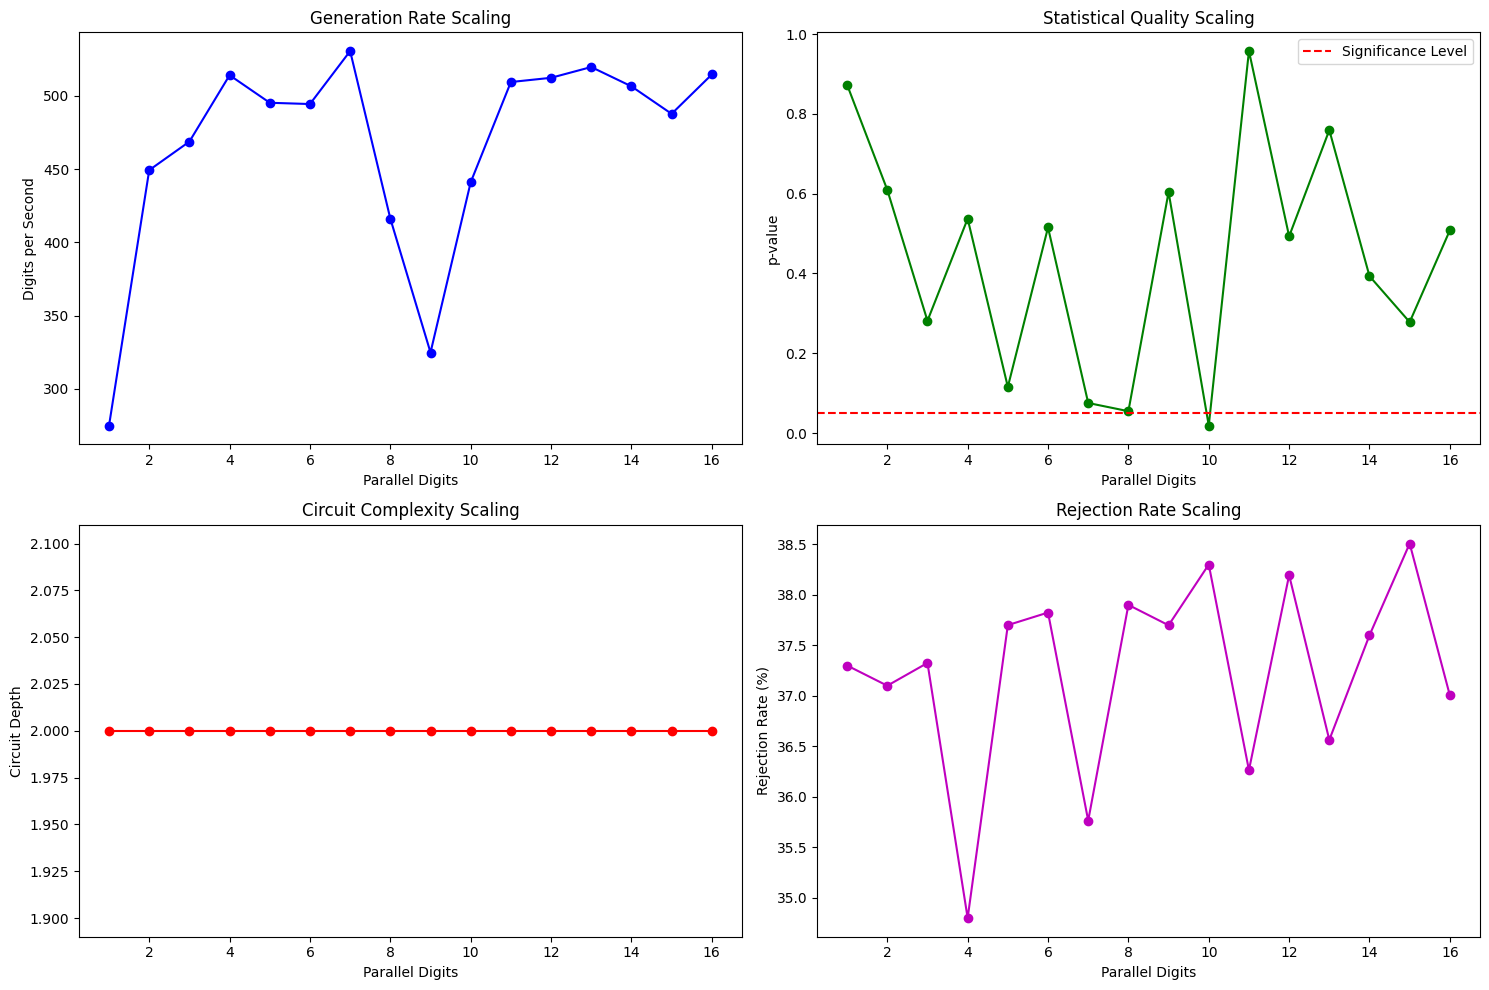


Scaling Analysis Summary:
Best Generation Rate: 530.62 digits/second
at 7 parallel digits

Optimal Configuration:
Parallel Digits: 11
Generation Rate: 509.48 digits/second
P-value: 0.9576
Rejection Rate: 36.26%
Circuit Depth: 2


In [8]:


import cirq
import numpy as np
from scipy import stats
import time
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple
from dataclasses import dataclass

@dataclass
class BenchmarkResult:
    parallel_count: int
    generation_rate: float
    p_value: float
    chi_square: float
    rejected_ratio: float
    circuit_depth: int
    generation_time: float
    number_length: int

class ScalableQRNG:
    def __init__(self, parallel_digits: int = 1, target_digits: int = 100):
        self.parallel_digits = parallel_digits
        self.target_digits = target_digits
        self.qubits_per_digit = 4

    def create_circuit(self) -> Tuple[cirq.Circuit, int]:
        """Creates circuit and returns (circuit, circuit_depth)"""
        self.qubits = [[cirq.GridQubit(i, j)
                       for j in range(self.qubits_per_digit)]
                      for i in range(self.parallel_digits)]

        circuit = cirq.Circuit()
        all_qubits = [qubit for row in self.qubits for qubit in row]

        # Apply Hadamard gates
        circuit.append(cirq.H.on_each(all_qubits))

        # Measure each group
        for i, qubit_row in enumerate(self.qubits):
            circuit.append(cirq.measure(*qubit_row, key=f'digit{i}'))

        return circuit, len(circuit)

    def binary_to_decimal(self, measurements: np.ndarray) -> int:
        return sum([bit * (2**idx) for idx, bit in enumerate(measurements)])

    def generate_number(self, simulator: cirq.Simulator = None) -> Dict:
        if simulator is None:
            simulator = cirq.Simulator()

        circuit, circuit_depth = self.create_circuit()
        start_time = time.time()

        rounds_needed = int(np.ceil(self.target_digits / self.parallel_digits))
        all_digits = []
        rejected_values = 0

        for _ in range(rounds_needed):
            results = simulator.run(circuit, repetitions=1)

            for i in range(self.parallel_digits):
                value = self.binary_to_decimal(results.measurements[f'digit{i}'][0])
                if value < 10:
                    all_digits.append(str(value))
                else:
                    rejected_values += 1

        number = ''.join(all_digits[:self.target_digits])
        generation_time = time.time() - start_time

        # Calculate statistics
        digit_counts = {str(i): number.count(str(i)) for i in range(10)}
        expected_count = len(number) / 10
        chi_square_stat = sum(
            ((count - expected_count) ** 2) / expected_count
            for count in digit_counts.values()
        )
        p_value = 1 - stats.chi2.cdf(chi_square_stat, 9)

        return {
            'number': number,
            'length': len(number),
            'time': generation_time,
            'rate': len(number) / generation_time,
            'rejected': rejected_values,
            'chi_square': chi_square_stat,
            'p_value': p_value,
            'circuit_depth': circuit_depth,
            'rejected_ratio': rejected_values / (len(number) + rejected_values)
        }

def run_parallel_benchmark(max_parallel: int = 32,
                         target_digits: int = 1000,
                         step_size: int = 1) -> List[BenchmarkResult]:
    """Run benchmark with increasing parallelization"""
    results = []
    simulator = cirq.Simulator()

    for parallel in range(1, max_parallel + 1, step_size):
        print(f"Testing {parallel} parallel digits...")
        generator = ScalableQRNG(parallel, target_digits)
        result = generator.generate_number(simulator)

        benchmark = BenchmarkResult(
            parallel_count=parallel,
            generation_rate=result['rate'],
            p_value=result['p_value'],
            chi_square=result['chi_square'],
            rejected_ratio=result['rejected_ratio'],
            circuit_depth=result['circuit_depth'],
            generation_time=result['time'],
            number_length=result['length']
        )
        results.append(benchmark)

    return results

def visualize_scaling(results: List[BenchmarkResult]):
    """Create comprehensive visualization of scaling behavior"""
    plt.figure(figsize=(15, 10))

    # Generation Rate vs Parallelization
    plt.subplot(2, 2, 1)
    plt.plot([r.parallel_count for r in results],
             [r.generation_rate for r in results],
             'b-', marker='o')
    plt.title('Generation Rate Scaling')
    plt.xlabel('Parallel Digits')
    plt.ylabel('Digits per Second')

    # Statistical Quality (p-value) vs Parallelization
    plt.subplot(2, 2, 2)
    plt.plot([r.parallel_count for r in results],
             [r.p_value for r in results],
             'g-', marker='o')
    plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level')
    plt.title('Statistical Quality Scaling')
    plt.xlabel('Parallel Digits')
    plt.ylabel('p-value')
    plt.legend()

    # Circuit Depth vs Parallelization
    plt.subplot(2, 2, 3)
    plt.plot([r.parallel_count for r in results],
             [r.circuit_depth for r in results],
             'r-', marker='o')
    plt.title('Circuit Complexity Scaling')
    plt.xlabel('Parallel Digits')
    plt.ylabel('Circuit Depth')

    # Rejection Rate vs Parallelization
    plt.subplot(2, 2, 4)
    plt.plot([r.parallel_count for r in results],
             [r.rejected_ratio * 100 for r in results],
             'm-', marker='o')
    plt.title('Rejection Rate Scaling')
    plt.xlabel('Parallel Digits')
    plt.ylabel('Rejection Rate (%)')

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("\nScaling Analysis Summary:")
    print("=" * 50)
    print(f"Best Generation Rate: {max(r.generation_rate for r in results):.2f} digits/second")
    print(f"at {results[np.argmax([r.generation_rate for r in results])].parallel_count} parallel digits")

    # Find optimal parallelization
    efficiency_scores = [r.generation_rate * r.p_value / (r.rejected_ratio + 0.1)
                        for r in results]
    optimal_idx = np.argmax(efficiency_scores)
    optimal_result = results[optimal_idx]

    print(f"\nOptimal Configuration:")
    print(f"Parallel Digits: {optimal_result.parallel_count}")
    print(f"Generation Rate: {optimal_result.generation_rate:.2f} digits/second")
    print(f"P-value: {optimal_result.p_value:.4f}")
    print(f"Rejection Rate: {optimal_result.rejected_ratio*100:.2f}%")
    print(f"Circuit Depth: {optimal_result.circuit_depth}")

# Run benchmark with increasing parallelization
print("Starting parallel scaling benchmark...")
benchmark_results = run_parallel_benchmark(
    max_parallel=16,  # Test up to 16 parallel digits
    target_digits=1000,  # Generate 1000 digits each time
    step_size=1  # Increment by 1
)

# Visualize results
visualize_scaling(benchmark_results)


Testing 1 parallel digits...

Example Circuit Structure:
(0, 0): ───H───@───────────M('digit_0')───
               │           │
(0, 1): ───H───@───@───────M──────────────
                   │       │
(0, 2): ───H───────@───@───M──────────────
                       │   │
(0, 3): ───H───────────@───M──────────────
Generation Rate: 300.87 digits/second
P-value: 0.3714
Deviations from 10%:
Digit 0: +0.59%
Digit 1: +0.75%
Digit 2: -2.35%
Digit 3: +0.75%
Digit 4: -0.07%
Digit 5: -0.07%
Digit 6: +0.75%
Digit 7: +1.89%
Digit 8: -2.18%
Digit 9: -0.07%

Testing 2 parallel digits...
Generation Rate: 374.93 digits/second
P-value: 0.9061
Deviations from 10%:
Digit 0: +0.60%
Digit 1: -0.86%
Digit 2: -0.21%
Digit 3: -0.86%
Digit 4: -1.35%
Digit 5: +0.93%
Digit 6: +0.11%
Digit 7: +0.11%
Digit 8: +1.42%
Digit 9: +0.11%

Testing 4 parallel digits...
Generation Rate: 404.89 digits/second
P-value: 0.1856
Deviations from 10%:
Digit 0: -0.67%
Digit 1: -0.02%
Digit 2: -0.51%
Digit 3: -2.14%
Digit 4: -0.34

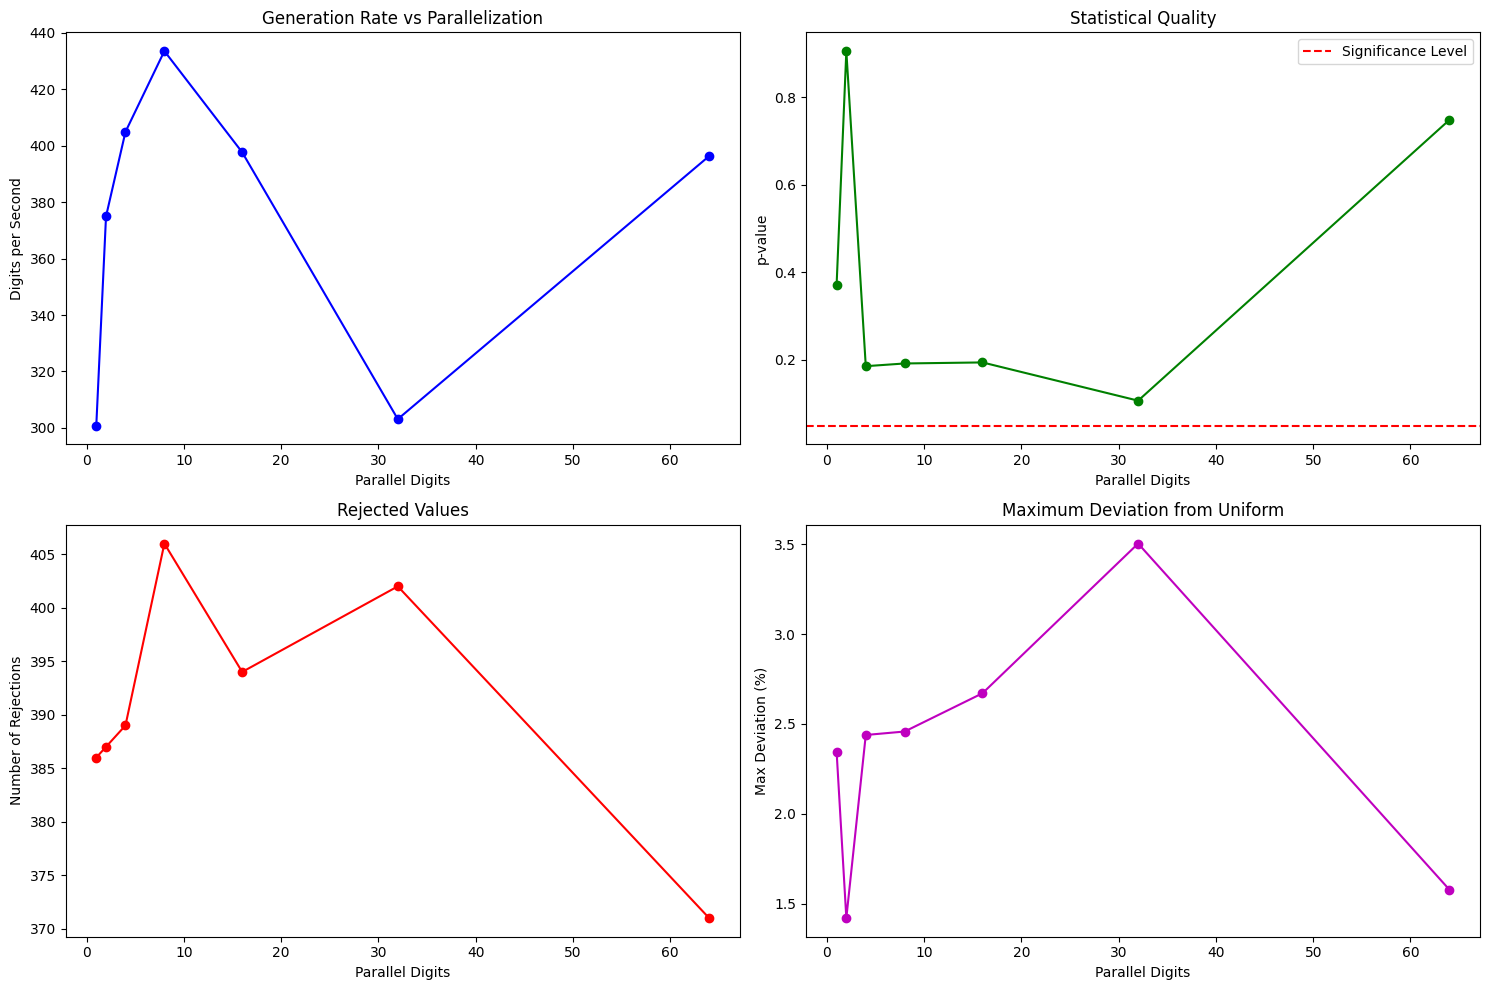


Optimal Configuration:
Parallel Digits: 8
Generation Rate: 433.51 digits/second
P-value: 0.1918
Maximum Deviation: 2.46%


In [9]:
import cirq
import numpy as np
from scipy import stats
import time
import matplotlib.pyplot as plt
from typing import Dict, List
from dataclasses import dataclass

@dataclass
class BenchmarkResult:
    parallel_count: int
    generation_rate: float
    p_value: float
    chi_square: float
    rejected_count: int
    generation_time: float
    number_length: int
    deviations: Dict[str, float]

class ParallelCircuitQRNG:
    def __init__(self, parallel_digits: int = 4, target_digits: int = 1000):
        self.parallel_digits = parallel_digits
        self.target_digits = target_digits
        self.qubits_per_digit = 4

    def create_circuit(self) -> cirq.Circuit:
        """Creates the specified circuit pattern for n parallel digits"""
        circuit = cirq.Circuit()

        # Create qubits for each parallel digit
        self.qubits = []
        for i in range(self.parallel_digits):
            digit_qubits = [cirq.GridQubit(i, j) for j in range(self.qubits_per_digit)]
            self.qubits.append(digit_qubits)

        # Apply gates for each group of qubits
        for digit_qubits in self.qubits:
            # Hadamard gates
            circuit.append(cirq.H.on_each(digit_qubits))

            # CZ gates in the specified pattern
            circuit.append(cirq.CZ(digit_qubits[0], digit_qubits[1]))
            circuit.append(cirq.CZ(digit_qubits[1], digit_qubits[2]))
            circuit.append(cirq.CZ(digit_qubits[2], digit_qubits[3]))

            # Measure the qubits
            circuit.append(cirq.measure(*digit_qubits,
                key=f'digit_{self.qubits.index(digit_qubits)}'))

        return circuit

    def binary_to_decimal(self, measurements: np.ndarray) -> int:
        """Convert binary measurements to decimal"""
        return sum([bit * (2**idx) for idx, bit in enumerate(measurements)])

    def generate_numbers(self, simulator: cirq.Simulator = None) -> Dict:
        """Generate random numbers and collect statistics"""
        if simulator is None:
            simulator = cirq.Simulator()

        circuit = self.create_circuit()
        start_time = time.time()

        rounds_needed = int(np.ceil(self.target_digits / self.parallel_digits))
        all_digits = []
        rejected_values = 0

        for _ in range(rounds_needed):
            results = simulator.run(circuit, repetitions=1)

            for i in range(self.parallel_digits):
                value = self.binary_to_decimal(
                    results.measurements[f'digit_{i}'][0])
                if value < 10:
                    all_digits.append(str(value))
                else:
                    rejected_values += 1

        generation_time = time.time() - start_time
        number = ''.join(all_digits[:self.target_digits])

        # Calculate statistics
        digit_counts = {str(i): number.count(str(i)) for i in range(10)}
        expected_count = len(number) / 10
        deviations = {
            d: (count/len(number)*100 - 10)
            for d, count in digit_counts.items()
        }

        chi_square_stat = sum(
            ((count - expected_count) ** 2) / expected_count
            for count in digit_counts.values()
        )
        p_value = 1 - stats.chi2.cdf(chi_square_stat, 9)

        return {
            'number': number,
            'length': len(number),
            'time': generation_time,
            'rate': len(number) / generation_time,
            'rejected': rejected_values,
            'chi_square': chi_square_stat,
            'p_value': p_value,
            'deviations': deviations
        }

def run_benchmark(parallel_sizes: List[int], target_digits: int = 1000) -> List[BenchmarkResult]:
    """Run benchmark for specified parallel sizes"""
    results = []
    simulator = cirq.Simulator()

    for parallel in parallel_sizes:
        print(f"\nTesting {parallel} parallel digits...")
        generator = ParallelCircuitQRNG(parallel, target_digits)

        # Show circuit for first run
        if parallel == parallel_sizes[0]:
            print("\nExample Circuit Structure:")
            print(generator.create_circuit())

        result = generator.generate_numbers(simulator)

        benchmark = BenchmarkResult(
            parallel_count=parallel,
            generation_rate=result['rate'],
            p_value=result['p_value'],
            chi_square=result['chi_square'],
            rejected_count=result['rejected'],
            generation_time=result['time'],
            number_length=result['length'],
            deviations=result['deviations']
        )

        print(f"Generation Rate: {result['rate']:.2f} digits/second")
        print(f"P-value: {result['p_value']:.4f}")
        print("Deviations from 10%:")
        for digit, dev in result['deviations'].items():
            print(f"Digit {digit}: {dev:+.2f}%")

        results.append(benchmark)

    return results

def visualize_results(results: List[BenchmarkResult]):
    """Create visualization of benchmark results"""
    plt.figure(figsize=(15, 10))

    # Generation Rate
    plt.subplot(2, 2, 1)
    parallel_counts = [r.parallel_count for r in results]
    rates = [r.generation_rate for r in results]
    plt.plot(parallel_counts, rates, 'b-o')
    plt.title('Generation Rate vs Parallelization')
    plt.xlabel('Parallel Digits')
    plt.ylabel('Digits per Second')

    # Statistical Quality
    plt.subplot(2, 2, 2)
    p_values = [r.p_value for r in results]
    plt.plot(parallel_counts, p_values, 'g-o')
    plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level')
    plt.title('Statistical Quality')
    plt.xlabel('Parallel Digits')
    plt.ylabel('p-value')
    plt.legend()

    # Rejection Count
    plt.subplot(2, 2, 3)
    rejected = [r.rejected_count for r in results]
    plt.plot(parallel_counts, rejected, 'r-o')
    plt.title('Rejected Values')
    plt.xlabel('Parallel Digits')
    plt.ylabel('Number of Rejections')

    # Maximum Deviation
    plt.subplot(2, 2, 4)
    max_devs = [max(abs(d) for d in r.deviations.values()) for r in results]
    plt.plot(parallel_counts, max_devs, 'm-o')
    plt.title('Maximum Deviation from Uniform')
    plt.xlabel('Parallel Digits')
    plt.ylabel('Max Deviation (%)')

    plt.tight_layout()
    plt.show()

# Run benchmark with different parallel sizes
parallel_sizes = [1, 2, 4, 8, 16, 32, 64]
benchmark_results = run_benchmark(parallel_sizes)
visualize_results(benchmark_results)

# Print optimal configuration
rates = [r.generation_rate for r in benchmark_results]
optimal_idx = np.argmax(rates)
optimal = benchmark_results[optimal_idx]

print("\nOptimal Configuration:")
print(f"Parallel Digits: {optimal.parallel_count}")
print(f"Generation Rate: {optimal.generation_rate:.2f} digits/second")
print(f"P-value: {optimal.p_value:.4f}")
print(f"Maximum Deviation: {max(abs(d) for d in optimal.deviations.values()):.2f}%")

Running Fine-Tuned Parallel Benchmark

Testing 6 parallel digits...
Generation Rate: 639.81 digits/second
P-value: 0.0177
Chi-square: 20.0400
Distribution Deviations:
Digit 0: +1.50%
Digit 1: +0.30%
Digit 2: -0.35%
Digit 3: -0.65%
Digit 4: +0.80%
Digit 5: +1.70%
Digit 6: -1.05%
Digit 7: -0.05%
Digit 8: -1.30%
Digit 9: -0.90%

Testing 7 parallel digits...
Generation Rate: 640.75 digits/second
P-value: 0.0372
Chi-square: 17.8300
Distribution Deviations:
Digit 0: -0.80%
Digit 1: -0.75%
Digit 2: +0.65%
Digit 3: +1.20%
Digit 4: +0.45%
Digit 5: +0.95%
Digit 6: -1.15%
Digit 7: +1.20%
Digit 8: -1.35%
Digit 9: -0.40%

Testing 8 parallel digits...
Generation Rate: 713.85 digits/second
P-value: 0.0954
Chi-square: 14.8400
Distribution Deviations:
Digit 0: +1.00%
Digit 1: -0.50%
Digit 2: -0.70%
Digit 3: -1.40%
Digit 4: +0.70%
Digit 5: +1.05%
Digit 6: -1.20%
Digit 7: +0.75%
Digit 8: +0.35%
Digit 9: -0.05%

Testing 9 parallel digits...
Generation Rate: 681.07 digits/second
P-value: 0.9627
Chi-square:

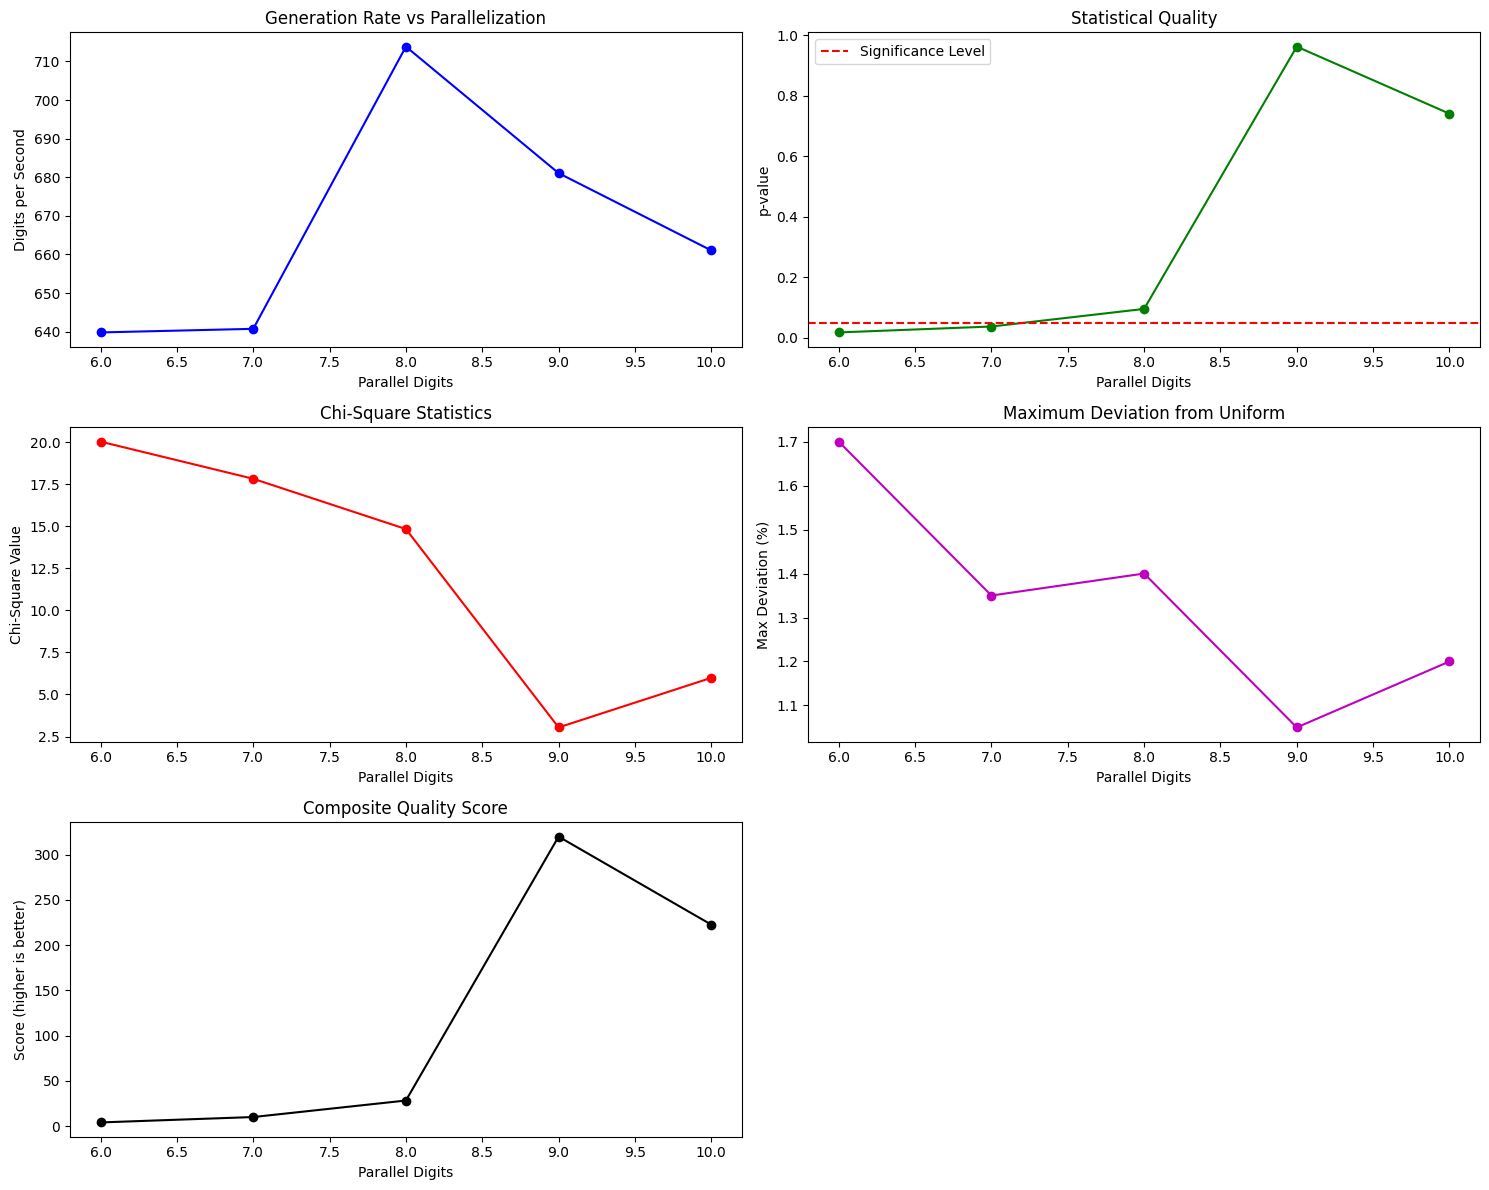


Optimal Configuration:
Parallel Digits: 9
Generation Rate: 681.07 digits/second
P-value: 0.9627
Chi-square: 3.0400
Maximum Deviation: 1.05%

Detailed Deviations for Optimal Configuration:
Digit 0: +0.15%
Digit 1: +0.25%
Digit 2: +0.15%
Digit 3: -0.05%
Digit 4: +0.10%
Digit 5: -0.25%
Digit 6: -1.05%
Digit 7: +0.15%
Digit 8: +0.10%
Digit 9: +0.45%


In [10]:
import cirq
import numpy as np
from scipy import stats
import time
import matplotlib.pyplot as plt
from typing import Dict, List
from dataclasses import dataclass

@dataclass
class BenchmarkResult:
    parallel_count: int
    generation_rate: float
    p_value: float
    chi_square: float
    rejected_count: int
    generation_time: float
    number_length: int
    deviations: Dict[str, float]

class ParallelCircuitQRNG:
    def __init__(self, parallel_digits: int = 8, target_digits: int = 2000):
        self.parallel_digits = parallel_digits
        self.target_digits = target_digits
        self.qubits_per_digit = 4

    def create_circuit(self) -> cirq.Circuit:
        circuit = cirq.Circuit()

        # Create qubits for each parallel digit
        self.qubits = []
        for i in range(self.parallel_digits):
            digit_qubits = [cirq.GridQubit(i, j) for j in range(self.qubits_per_digit)]
            self.qubits.append(digit_qubits)

        # Apply gates for each group of qubits
        for digit_qubits in self.qubits:
            # Hadamard gates
            circuit.append(cirq.H.on_each(digit_qubits))

            # CZ gates in the specified pattern
            circuit.append(cirq.CZ(digit_qubits[0], digit_qubits[1]))
            circuit.append(cirq.CZ(digit_qubits[1], digit_qubits[2]))
            circuit.append(cirq.CZ(digit_qubits[2], digit_qubits[3]))

            # Measure the qubits
            circuit.append(cirq.measure(*digit_qubits,
                key=f'digit_{self.qubits.index(digit_qubits)}'))

        return circuit

    def binary_to_decimal(self, measurements: np.ndarray) -> int:
        return sum([bit * (2**idx) for idx, bit in enumerate(measurements)])

    def generate_numbers(self, simulator: cirq.Simulator = None, runs: int = 3) -> Dict:
        """Generate numbers multiple times and average the results"""
        if simulator is None:
            simulator = cirq.Simulator()

        circuit = self.create_circuit()

        # Run multiple times and average results
        total_time = 0
        total_digits = []
        total_rejected = 0

        for _ in range(runs):
            start_time = time.time()
            rounds_needed = int(np.ceil(self.target_digits / self.parallel_digits))
            run_digits = []
            run_rejected = 0

            for _ in range(rounds_needed):
                results = simulator.run(circuit, repetitions=1)

                for i in range(self.parallel_digits):
                    value = self.binary_to_decimal(
                        results.measurements[f'digit_{i}'][0])
                    if value < 10:
                        run_digits.append(str(value))
                    else:
                        run_rejected += 1

            total_time += time.time() - start_time
            total_digits.extend(run_digits[:self.target_digits])
            total_rejected += run_rejected

        # Average the results
        avg_time = total_time / runs
        number = ''.join(total_digits[:self.target_digits])

        # Calculate statistics
        digit_counts = {str(i): number.count(str(i)) for i in range(10)}
        expected_count = len(number) / 10
        deviations = {
            d: (count/len(number)*100 - 10)
            for d, count in digit_counts.items()
        }

        chi_square_stat = sum(
            ((count - expected_count) ** 2) / expected_count
            for count in digit_counts.values()
        )
        p_value = 1 - stats.chi2.cdf(chi_square_stat, 9)

        return {
            'number': number,
            'length': len(number),
            'time': avg_time,
            'rate': len(number) / avg_time,
            'rejected': total_rejected // runs,  # Average rejected values
            'chi_square': chi_square_stat,
            'p_value': p_value,
            'deviations': deviations
        }

def run_fine_tuned_benchmark(target_digits: int = 2000):
    """Run benchmark for fine-tuned parallel range"""
    parallel_sizes = [6, 7, 8, 9, 10]
    results = []
    simulator = cirq.Simulator()

    print("Running Fine-Tuned Parallel Benchmark")
    print("=" * 50)

    for parallel in parallel_sizes:
        print(f"\nTesting {parallel} parallel digits...")
        generator = ParallelCircuitQRNG(parallel, target_digits)

        # Run multiple times for more stable results
        result = generator.generate_numbers(simulator, runs=3)

        benchmark = BenchmarkResult(
            parallel_count=parallel,
            generation_rate=result['rate'],
            p_value=result['p_value'],
            chi_square=result['chi_square'],
            rejected_count=result['rejected'],
            generation_time=result['time'],
            number_length=result['length'],
            deviations=result['deviations']
        )

        print(f"Generation Rate: {result['rate']:.2f} digits/second")
        print(f"P-value: {result['p_value']:.4f}")
        print(f"Chi-square: {result['chi_square']:.4f}")
        print("Distribution Deviations:")
        for digit, dev in sorted(result['deviations'].items()):
            print(f"Digit {digit}: {dev:+.2f}%")

        results.append(benchmark)

    return results

def visualize_fine_tuned_results(results: List[BenchmarkResult]):
    """Create detailed visualization of fine-tuned results"""
    plt.figure(figsize=(15, 12))

    # Generation Rate
    plt.subplot(3, 2, 1)
    parallel_counts = [r.parallel_count for r in results]
    rates = [r.generation_rate for r in results]
    plt.plot(parallel_counts, rates, 'b-o')
    plt.title('Generation Rate vs Parallelization')
    plt.xlabel('Parallel Digits')
    plt.ylabel('Digits per Second')

    # Statistical Quality
    plt.subplot(3, 2, 2)
    p_values = [r.p_value for r in results]
    plt.plot(parallel_counts, p_values, 'g-o')
    plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level')
    plt.title('Statistical Quality')
    plt.xlabel('Parallel Digits')
    plt.ylabel('p-value')
    plt.legend()

    # Chi-square values
    plt.subplot(3, 2, 3)
    chi_squares = [r.chi_square for r in results]
    plt.plot(parallel_counts, chi_squares, 'r-o')
    plt.title('Chi-Square Statistics')
    plt.xlabel('Parallel Digits')
    plt.ylabel('Chi-Square Value')

    # Maximum Deviation
    plt.subplot(3, 2, 4)
    max_devs = [max(abs(d) for d in r.deviations.values()) for r in results]
    plt.plot(parallel_counts, max_devs, 'm-o')
    plt.title('Maximum Deviation from Uniform')
    plt.xlabel('Parallel Digits')
    plt.ylabel('Max Deviation (%)')

    # Composite Score (combining multiple metrics)
    plt.subplot(3, 2, 5)
    scores = [r.generation_rate * r.p_value / (max(abs(d) for d in r.deviations.values()) + 1)
              for r in results]
    plt.plot(parallel_counts, scores, 'k-o')
    plt.title('Composite Quality Score')
    plt.xlabel('Parallel Digits')
    plt.ylabel('Score (higher is better)')

    plt.tight_layout()
    plt.show()

    # Find and print optimal configuration
    scores = [r.generation_rate * r.p_value / (max(abs(d) for d in r.deviations.values()) + 1)
              for r in results]
    optimal_idx = np.argmax(scores)
    optimal = results[optimal_idx]

    print("\nOptimal Configuration:")
    print(f"Parallel Digits: {optimal.parallel_count}")
    print(f"Generation Rate: {optimal.generation_rate:.2f} digits/second")
    print(f"P-value: {optimal.p_value:.4f}")
    print(f"Chi-square: {optimal.chi_square:.4f}")
    print(f"Maximum Deviation: {max(abs(d) for d in optimal.deviations.values()):.2f}%")
    print("\nDetailed Deviations for Optimal Configuration:")
    for digit, dev in sorted(optimal.deviations.items()):
        print(f"Digit {digit}: {dev:+.2f}%")

# Run the fine-tuned benchmark
results = run_fine_tuned_benchmark()
visualize_fine_tuned_results(results)


Analyzing 1 parallel digits...
P-value: 0.5407
Chi-square: 7.9354
Entropy: 3.3210 bits
Autocorrelation: 0.0004
Runs test p-value: 0.0000
Maximum deviation: 0.65%

Digit Distribution:
Digit 0: 10.16% (Deviation: +0.16%)
Digit 1: 9.77% (Deviation: -0.23%)
Digit 2: 10.54% (Deviation: +0.54%)
Digit 3: 9.47% (Deviation: -0.53%)
Digit 4: 9.35% (Deviation: -0.65%)
Digit 5: 10.08% (Deviation: +0.08%)
Digit 6: 10.35% (Deviation: +0.35%)
Digit 7: 10.24% (Deviation: +0.24%)
Digit 8: 9.93% (Deviation: -0.07%)
Digit 9: 10.12% (Deviation: +0.12%)

Analyzing 2 parallel digits...
P-value: 0.6574
Chi-square: 6.8052
Entropy: 3.3211 bits
Autocorrelation: -0.0215
Runs test p-value: 0.0000
Maximum deviation: 0.64%

Digit Distribution:
Digit 0: 9.59% (Deviation: -0.41%)
Digit 1: 10.27% (Deviation: +0.27%)
Digit 2: 9.83% (Deviation: -0.17%)
Digit 3: 9.58% (Deviation: -0.42%)
Digit 4: 10.64% (Deviation: +0.64%)
Digit 5: 9.85% (Deviation: -0.15%)
Digit 6: 9.79% (Deviation: -0.21%)
Digit 7: 9.90% (Deviation: -

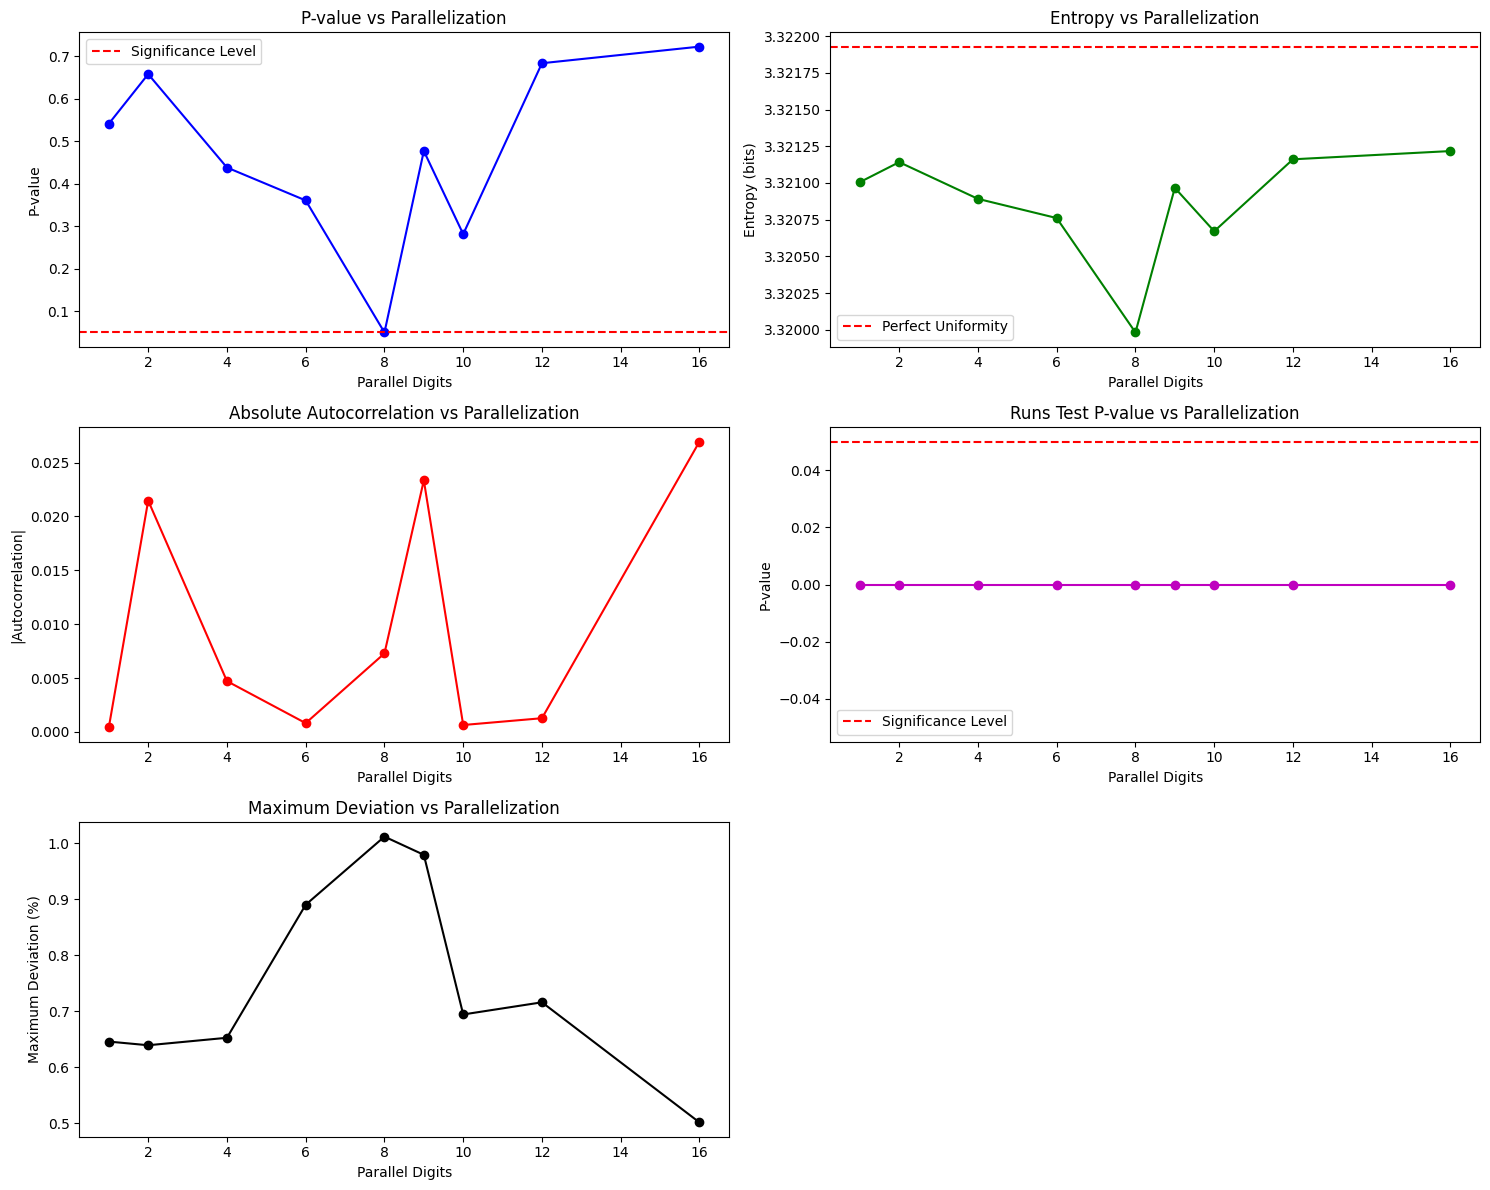


Optimal Configuration Analysis:
Parallel Digits: 1
P-value: 0.5407
Entropy: 3.3210 bits
Autocorrelation: 0.0004
Runs test p-value: 0.0000
Maximum deviation: 0.65%


In [14]:
import cirq
import numpy as np
from scipy import stats
import time
import matplotlib.pyplot as plt
import re  # Added missing import
from typing import Dict, List, Tuple
from dataclasses import dataclass

@dataclass
class QualityMetrics:
    parallel_count: int
    p_value: float
    chi_square: float
    entropy: float
    autocorrelation: float
    runs_test_p: float
    max_deviation: float

class ParallelCircuitQRNG:
    def __init__(self, parallel_digits: int = 9, target_digits: int = 10000):
        self.parallel_digits = parallel_digits
        self.target_digits = target_digits
        self.qubits_per_digit = 4

    def create_circuit(self) -> cirq.Circuit:
        circuit = cirq.Circuit()

        self.qubits = []
        for i in range(self.parallel_digits):
            digit_qubits = [cirq.GridQubit(i, j) for j in range(self.qubits_per_digit)]
            self.qubits.append(digit_qubits)

            # Hadamard gates
            circuit.append(cirq.H.on_each(digit_qubits))

            # CZ gates pattern
            circuit.append(cirq.CZ(digit_qubits[0], digit_qubits[1]))
            circuit.append(cirq.CZ(digit_qubits[1], digit_qubits[2]))
            circuit.append(cirq.CZ(digit_qubits[2], digit_qubits[3]))

            # Measure
            circuit.append(cirq.measure(*digit_qubits, key=f'digit{i}'))

        return circuit

    def binary_to_decimal(self, measurements: np.ndarray) -> int:
        return sum([bit * (2**idx) for idx, bit in enumerate(measurements)])

    def generate_numbers(self) -> Dict:
        simulator = cirq.Simulator()
        circuit = self.create_circuit()

        rounds_needed = int(np.ceil(self.target_digits / self.parallel_digits))
        all_digits = []
        rejected_values = 0

        for _ in range(rounds_needed):
            results = simulator.run(circuit, repetitions=1)

            for i in range(self.parallel_digits):
                value = self.binary_to_decimal(results.measurements[f'digit{i}'][0])
                if value < 10:
                    all_digits.append(str(value))
                else:
                    rejected_values += 1

        number = ''.join(all_digits[:self.target_digits])

        return {
            'number': number,
            'rejected': rejected_values
        }

class StatisticalAnalyzer:
    def __init__(self, parallel_digits: List[int] = [1, 2, 4, 8, 16, 32],
                 sample_size: int = 10000):
        self.parallel_digits = parallel_digits
        self.sample_size = sample_size

    def calculate_entropy(self, numbers: str) -> float:
        """Calculate Shannon entropy of the distribution"""
        counts = {str(i): numbers.count(str(i)) for i in range(10)}
        total = len(numbers)
        probabilities = [count/total for count in counts.values()]
        return -sum(p * np.log2(p) if p > 0 else 0 for p in probabilities)

    def calculate_autocorrelation(self, numbers: str, lag: int = 1) -> float:
        """Calculate autocorrelation at given lag"""
        nums = [int(x) for x in numbers]
        n = len(nums)
        mean = np.mean(nums)
        var = np.var(nums)

        if var == 0:
            return 0

        autocorr = np.sum([(nums[i] - mean) * (nums[i+lag] - mean)
                          for i in range(n-lag)]) / ((n-lag) * var)
        return autocorr

    def runs_test(self, numbers: str) -> float:
        """Perform Wald-Wolfowitz runs test"""
        median = np.median([int(x) for x in numbers])
        runs = ''.join('1' if int(x) > median else '0' for x in numbers)

        # Count runs
        n_runs = len([m.start() for m in re.finditer('01|10', runs)]) + 1
        n1 = runs.count('1')
        n2 = runs.count('0')

        # Calculate expected runs and variance
        exp_runs = ((2 * n1 * n2) / (n1 + n2)) + 1
        var_runs = ((2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) /
                   ((n1 + n2)**2 * (n1 + n2 - 1)))

        # Calculate Z-statistic
        z = (n_runs - exp_runs) / np.sqrt(var_runs)
        return 2 * (1 - stats.norm.cdf(abs(z)))  # Two-tailed p-value

    def analyze_parallel_quality(self) -> List[QualityMetrics]:
        """Analyze quality metrics for different parallel configurations"""
        results = []

        for parallel in self.parallel_digits:
            print(f"\nAnalyzing {parallel} parallel digits...")

            # Generate numbers
            generator = ParallelCircuitQRNG(parallel, self.sample_size)
            result = generator.generate_numbers()
            numbers = result['number']

            # Calculate metrics
            digit_counts = {str(i): numbers.count(str(i)) for i in range(10)}
            expected_count = len(numbers) / 10

            chi_square = sum(((count - expected_count) ** 2) / expected_count
                           for count in digit_counts.values())
            p_value = 1 - stats.chi2.cdf(chi_square, 9)

            # Calculate deviations
            deviations = {d: (count/len(numbers)*100 - 10)
                         for d, count in digit_counts.items()}
            max_deviation = max(abs(d) for d in deviations.values())

            # Additional statistical tests
            entropy = self.calculate_entropy(numbers)
            autocorr = self.calculate_autocorrelation(numbers)
            runs_p = self.runs_test(numbers)

            metrics = QualityMetrics(
                parallel_count=parallel,
                p_value=p_value,
                chi_square=chi_square,
                entropy=entropy,
                autocorrelation=autocorr,
                runs_test_p=runs_p,
                max_deviation=max_deviation
            )
            results.append(metrics)

            # Print detailed results
            print(f"P-value: {p_value:.4f}")
            print(f"Chi-square: {chi_square:.4f}")
            print(f"Entropy: {entropy:.4f} bits")
            print(f"Autocorrelation: {autocorr:.4f}")
            print(f"Runs test p-value: {runs_p:.4f}")
            print(f"Maximum deviation: {max_deviation:.2f}%")
            print("\nDigit Distribution:")
            for digit, count in sorted(digit_counts.items()):
                percentage = (count/len(numbers)*100)
                deviation = percentage - 10
                print(f"Digit {digit}: {percentage:.2f}% (Deviation: {deviation:+.2f}%)")

        return results

    def visualize_quality_metrics(self, results: List[QualityMetrics]):
        """Create visualization of quality metrics"""
        plt.figure(figsize=(15, 12))
        parallel_counts = [r.parallel_count for r in results]

        # P-value plot
        plt.subplot(3, 2, 1)
        plt.plot(parallel_counts, [r.p_value for r in results], 'b-o')
        plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level')
        plt.title('P-value vs Parallelization')
        plt.xlabel('Parallel Digits')
        plt.ylabel('P-value')
        plt.legend()

        # Entropy plot
        plt.subplot(3, 2, 2)
        plt.plot(parallel_counts, [r.entropy for r in results], 'g-o')
        plt.axhline(y=np.log2(10), color='r', linestyle='--',
                   label='Perfect Uniformity')
        plt.title('Entropy vs Parallelization')
        plt.xlabel('Parallel Digits')
        plt.ylabel('Entropy (bits)')
        plt.legend()

        # Autocorrelation plot
        plt.subplot(3, 2, 3)
        plt.plot(parallel_counts, [abs(r.autocorrelation) for r in results], 'r-o')
        plt.title('Absolute Autocorrelation vs Parallelization')
        plt.xlabel('Parallel Digits')
        plt.ylabel('|Autocorrelation|')

        # Runs test plot
        plt.subplot(3, 2, 4)
        plt.plot(parallel_counts, [r.runs_test_p for r in results], 'm-o')
        plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level')
        plt.title('Runs Test P-value vs Parallelization')
        plt.xlabel('Parallel Digits')
        plt.ylabel('P-value')
        plt.legend()

        # Maximum deviation plot
        plt.subplot(3, 2, 5)
        plt.plot(parallel_counts, [r.max_deviation for r in results], 'k-o')
        plt.title('Maximum Deviation vs Parallelization')
        plt.xlabel('Parallel Digits')
        plt.ylabel('Maximum Deviation (%)')

        plt.tight_layout()
        plt.show()

# Run analysis with more focused parallel range
analyzer = StatisticalAnalyzer(
    parallel_digits=[1, 2, 4, 6, 8, 9, 10, 12, 16],  # More detailed around optimal range
    sample_size=10000  # Increased sample size for better statistics
)
results = analyzer.analyze_parallel_quality()
analyzer.visualize_quality_metrics(results)

# Print optimal configuration based on combined metrics
scores = [(r.p_value * r.entropy) / (r.max_deviation * abs(r.autocorrelation) + 0.001)
          for r in results]
optimal_idx = np.argmax(scores)
optimal = results[optimal_idx]

print("\nOptimal Configuration Analysis:")
print(f"Parallel Digits: {optimal.parallel_count}")
print(f"P-value: {optimal.p_value:.4f}")
print(f"Entropy: {optimal.entropy:.4f} bits")
print(f"Autocorrelation: {optimal.autocorrelation:.4f}")
print(f"Runs test p-value: {optimal.runs_test_p:.4f}")
print(f"Maximum deviation: {optimal.max_deviation:.2f}%")